In [1238]:
import numpy as np 
import pandas as pd 
import seaborn as sns 

import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from hmmlearn import hmm
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error

In [1244]:
df01_Aguascalientes = pd.read_csv('Datasets/dataset_32.csv')
df01_Aguascalientes

,Unnamed: 0,1985-01-01 00:00:00,1985-02-01 00:00:00,1985-03-01 00:00:00,1985-04-01 00:00:00,1985-05-01 00:00:00,1985-06-01 00:00:00,1985-07-01 00:00:00,1985-08-01 00:00:00,1985-09-01 00:00:00,...,2023-03-01 00:00:00,2023-04-01 00:00:00,2023-05-01 00:00:00,2023-06-01 00:00:00,2023-07-01 00:00:00,2023-08-01 00:00:00,2023-09-01 00:00:00,2023-10-01 00:00:00,2023-11-01 00:00:00,2023-12-01 00:00:00
0,NACIONAL,36.0,16.5,15.0,37.2,51.5,126.9,139.8,118.8,106.1,...,15.9,15.4,40.0,39.2,99.8,111.4,65.9,95.7,50.4,26.7


In [1245]:
# Establecer la columna 'Unnamed: 0' como el índice
df01_Aguascalientes.set_index('Unnamed: 0', inplace=True)

# Transponer el dataframe para que las fechas sean el índice
df01_Aguascalientes = df01_Aguascalientes.transpose()


In [1246]:
df01_Aguascalientes

Unnamed: 0,NACIONAL
1985-01-01 00:00:00,36.0
1985-02-01 00:00:00,16.5
1985-03-01 00:00:00,15.0
1985-04-01 00:00:00,37.2
1985-05-01 00:00:00,51.5
...,...
2023-08-01 00:00:00,111.4
2023-09-01 00:00:00,65.9
2023-10-01 00:00:00,95.7
2023-11-01 00:00:00,50.4


In [1247]:
df01_Aguascalientes = df01_Aguascalientes.rename(columns={'NACIONAL' : 'MM/D'})

In [1248]:
df01_Aguascalientes

Unnamed: 0,MM/D
1985-01-01 00:00:00,36.0
1985-02-01 00:00:00,16.5
1985-03-01 00:00:00,15.0
1985-04-01 00:00:00,37.2
1985-05-01 00:00:00,51.5
...,...
2023-08-01 00:00:00,111.4
2023-09-01 00:00:00,65.9
2023-10-01 00:00:00,95.7
2023-11-01 00:00:00,50.4


In [1249]:
import plotly.graph_objects as go

In [1250]:
fig = go.Figure()

# Añadir la línea de Ethereum
fig.add_trace(go.Scatter(x=df01_Aguascalientes.index, y=df01_Aguascalientes['MM/D'], mode='lines', name='Precipitacion'))

# Configurar el formato del eje x para las fechas
fig.update_xaxes(
    tickformat='%Y-%m-%d',
    tickmode='auto',
    nticks=20  # ajusta este valor según la cantidad de etiquetas de fecha que quieras mostrar
)

# Añadir títulos y etiquetas
fig.update_layout(
    title='Gráfico de Serie de Tiempo Precipitacion Pluvial Aguascalientes',
    xaxis_title='Fecha',
    yaxis_title='Valor',
    legend_title='Leyenda',
    width=1400,
    height=600
)

# Mostrar el gráfico
fig.show()

In [1251]:
df01_Aguascalientes = df01_Aguascalientes.reset_index()

In [1252]:
df01_Aguascalientes['index'] = pd.to_datetime(df01_Aguascalientes['index'])

In [1253]:
df01_Aguascalientes = df01_Aguascalientes.set_index('index')

In [1254]:
serie = df01_Aguascalientes['MM/D']

df01_Aguascalientes.index.freq = 'MS'

In [1255]:
vectzeros = []

for i, value in df01_Aguascalientes['MM/D'].items():
    if value == 0:
        vectzeros.append(i)

In [1256]:
len(df01_Aguascalientes['MM/D'])

468

In [1257]:
mean_value = np.mean(df01_Aguascalientes['MM/D'][df01_Aguascalientes['MM/D'] != 0])

#Reemplazar los valores cero por el promedio
df01_Aguascalientes['MM/D'] = df01_Aguascalientes['MM/D'].replace(0, mean_value)

ARIMA(0, 0, 0) AIC:5069.819657833972
ARIMA(0, 0, 1) AIC:4781.116847329904


ARIMA(0, 0, 2) AIC:4691.792300850328
ARIMA(0, 0, 3) AIC:4628.2253202620495
ARIMA(0, 0, 4) AIC:4622.726762589855
ARIMA(0, 0, 5) AIC:4613.189958807361
ARIMA(0, 1, 0) AIC:4770.745839783303
ARIMA(0, 1, 1) AIC:4751.951305807716
ARIMA(0, 1, 2) AIC:4748.235512479646
ARIMA(0, 1, 3) AIC:4687.32243631842


/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



ARIMA(0, 1, 4) AIC:4623.338099690731


/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



ARIMA(0, 1, 5) AIC:4617.5657764116895
ARIMA(0, 2, 0) AIC:4968.360981829617
ARIMA(0, 2, 1) AIC:4769.711470171052
ARIMA(0, 2, 2) AIC:4750.566357460291
ARIMA(0, 2, 3) AIC:4746.618630565684


/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



ARIMA(0, 2, 4) AIC:4748.002922583616


/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



ARIMA(0, 2, 5) AIC:4627.5309220387735
ARIMA(1, 0, 0) AIC:4717.082038246077
ARIMA(1, 0, 1) AIC:4672.8507806920015
ARIMA(1, 0, 2) AIC:4652.66019526755


/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



ARIMA(1, 0, 3) AIC:4625.403442956711


/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



ARIMA(1, 0, 4) AIC:4585.255561327909
ARIMA(1, 0, 5) AIC:4565.504655148285
ARIMA(1, 1, 0) AIC:4749.591765871911
ARIMA(1, 1, 1) AIC:4751.545337946668
ARIMA(1, 1, 2) AIC:4667.635590745077


/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



ARIMA(1, 1, 3) AIC:4647.464111829153
ARIMA(1, 1, 4) AIC:4620.25037046213


/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 5) AIC:4619.613131833493
ARIMA(1, 2, 0) AIC:4889.360610396542
ARIMA(1, 2, 1) AIC:4748.072106057022
ARIMA(1, 2, 2) AIC:4750.011236680408
ARIMA(1, 2, 3) AIC:4754.47888562833


/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



ARIMA(1, 2, 4) AIC:4746.0254026437515
ARIMA(1, 2, 5) AIC:4751.970288849052
ARIMA(2, 0, 0) AIC:4632.796870932558
ARIMA(2, 0, 1) AIC:4478.951697824296


/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



ARIMA(2, 0, 2) AIC:4413.6098758846965
ARIMA(2, 0, 3) AIC:4358.552591536372


/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



ARIMA(2, 0, 4) AIC:4359.6226757889535


/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



ARIMA(2, 0, 5) AIC:4358.300765595761
ARIMA(2, 1, 0) AIC:4751.47997230872
ARIMA(2, 1, 1) AIC:4752.953332346292
ARIMA(2, 1, 2) AIC:4469.351985339822


/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



ARIMA(2, 1, 3) AIC:4440.954045864488


/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



ARIMA(2, 1, 4) AIC:4598.39509713591
ARIMA(2, 1, 5) AIC:4598.656274751508
ARIMA(2, 2, 0) AIC:4878.554994871341
ARIMA(2, 2, 1) AIC:4749.9371485229885
ARIMA(2, 2, 2) AIC:4752.070183877844


/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



ARIMA(2, 2, 3) AIC:4701.877686344998


/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



ARIMA(2, 2, 4) AIC:4731.690270385927


/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 5) AIC:4751.3042110283095
ARIMA(3, 0, 0) AIC:4576.025979328096
ARIMA(3, 0, 1) AIC:4469.099493654683


/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



ARIMA(3, 0, 2) AIC:4414.511836742


/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 3) AIC:4412.00212444321
ARIMA(3, 0, 4) AIC:4361.293249704442


/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 5) AIC:4364.813753461045
ARIMA(3, 1, 0) AIC:4742.972833385054
ARIMA(3, 1, 1) AIC:4572.1409390673


/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



ARIMA(3, 1, 2) AIC:4459.364456585783


/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



ARIMA(3, 1, 3) AIC:4473.345502757482


/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



ARIMA(3, 1, 4) AIC:4763.296409123458


/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



ARIMA(3, 1, 5) AIC:4361.021540745162
ARIMA(3, 2, 0) AIC:4878.244080138383
ARIMA(3, 2, 1) AIC:4741.73887955733


/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



ARIMA(3, 2, 2) AIC:4753.925897550016


/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



ARIMA(3, 2, 3) AIC:4743.555685739383


/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



ARIMA(3, 2, 4) AIC:4731.075915409838


/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 5) AIC:4738.25399702952
ARIMA(4, 0, 0) AIC:4540.799539905309
ARIMA(4, 0, 1) AIC:4464.195983739896


/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



ARIMA(4, 0, 2) AIC:4402.7251692795035


/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 3) AIC:4378.6192051009675


/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



ARIMA(4, 0, 4) AIC:4364.416160042347


/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 5) AIC:4355.929576044258
ARIMA(4, 1, 0) AIC:4708.65252817132
ARIMA(4, 1, 1) AIC:4537.434950534098
ARIMA(4, 1, 2) AIC:4453.924043896019


/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



ARIMA(4, 1, 3) AIC:4458.791298170065


/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



ARIMA(4, 1, 4) AIC:4444.697638004415


/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 5) AIC:4405.540235926205
ARIMA(4, 2, 0) AIC:4855.617507302501
ARIMA(4, 2, 1) AIC:4707.960222649901


/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



ARIMA(4, 2, 2) AIC:4547.3875317967795
ARIMA(4, 2, 3) AIC:4583.869025580553


/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



ARIMA(4, 2, 4) AIC:4727.42512359134


/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 5) AIC:4737.931946603194
ARIMA(5, 0, 0) AIC:4531.719847982658
ARIMA(5, 0, 1) AIC:4459.490993069425


/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



ARIMA(5, 0, 2) AIC:4468.1867176916785


/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



ARIMA(5, 0, 3) AIC:4449.619297883348


/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



ARIMA(5, 0, 4) AIC:4370.206797470235


/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(5, 0, 5) AIC:4419.318587817626
ARIMA(5, 1, 0) AIC:4701.445595170295
ARIMA(5, 1, 1) AIC:4528.655468512443
ARIMA(5, 1, 2) AIC:4541.401609785272


/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



ARIMA(5, 1, 3) AIC:4533.144380003674


/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



ARIMA(5, 1, 4) AIC:4468.847054164042


/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(5, 1, 5) AIC:4446.384956543145
ARIMA(5, 2, 0) AIC:4837.896848462732
ARIMA(5, 2, 1) AIC:4701.0318139254805
ARIMA(5, 2, 2) AIC:4711.896377591235


/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



ARIMA(5, 2, 3) AIC:4549.830849490365


/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



ARIMA(5, 2, 4) AIC:4580.461698406619


/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



ARIMA(5, 2, 5) AIC:4603.413059469634
Best ARIMA(4, 0, 5) AIC:4355.929576044258


/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



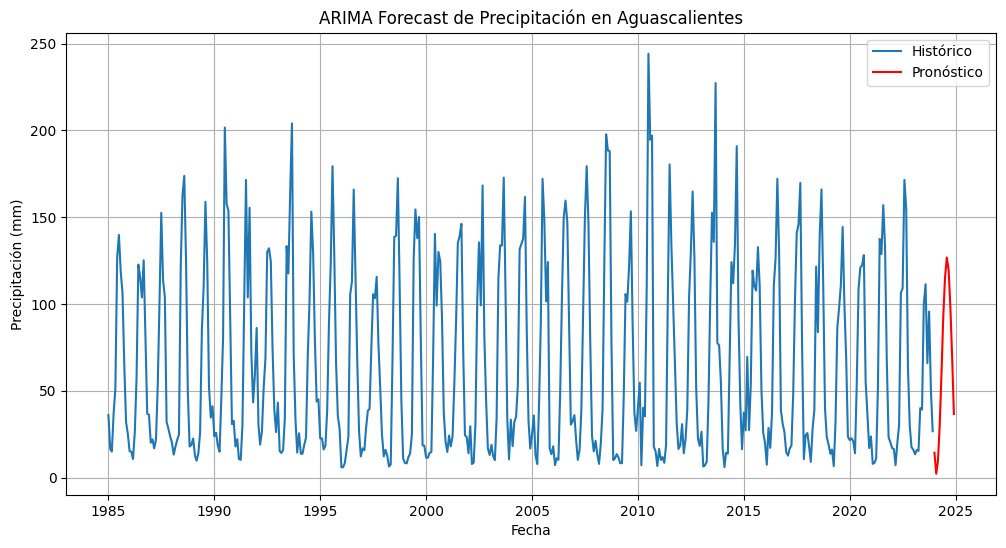

In [1258]:
# Definir los rangos de los parámetros p, d, q
p_values = range(0, 6)
d_values = range(0, 3)
q_values = range(0, 6)

best_score, best_params = float("inf"), None

#######Realizar Grid Search
for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                model = ARIMA(serie, order=(p, d, q))
                model_fit = model.fit()
                aic = model_fit.aic
                if aic < best_score:
                    best_score, best_params = aic, (p, d, q)
                print(f'ARIMA{(p,d,q)} AIC:{aic}')
            except:
                continue

print(f'Best ARIMA{best_params} AIC:{best_score}')

########Ajustar el mejor modelo encontrado
model = ARIMA(serie, order=best_params)
model_fit = model.fit()

#-------------------Hacer un pronóstico (forecast) para los próximos 24 meses
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)

#--------------Crear un rango de fechas para el pronóstico
last_date = serie.index[-1]
forecast_dates = pd.date_range(last_date, periods=forecast_steps + 1, freq='MS')[1:]

#-xdddddddd--------Graficar los datos históricos y el pronóstico
plt.figure(figsize=(12, 6))
plt.plot(serie, label='Histórico')
plt.plot(forecast_dates, forecast, label='Pronóstico', color='red')
plt.title('ARIMA Forecast de Precipitación en Aguascalientes')
plt.xlabel('Fecha')
plt.ylabel('Precipitación (mm)')
plt.legend()
plt.grid(True)
plt.show()

In [1259]:
best_score

4355.929576044258

In [1260]:
best_params

(4, 0, 5)

In [1261]:
########Ajustar el mejor modelo encontrado
model = ARIMA(serie, order=best_params)
model_fit = model.fit()

#-------------------Hacer un pronóstico (forecast) para los próximos 24 meses
forecast_steps = 32
forecast = model_fit.forecast(steps=forecast_steps)

#--------------Crear un rango de fechas para el pronóstico
last_date = serie.index[-1]
forecast_dates = pd.date_range(last_date, periods=forecast_steps + 1, freq='MS')[1:]


/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/home/angel/Documentos/RainWise/env/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [1262]:
fig = go.Figure()

######Agregar la serie histórica
fig.add_trace(go.Scatter(x=serie.index, y=serie.values, mode='lines', name='Histórico'))

#####Agregar el pronóstico
fig.add_trace(go.Scatter(x=forecast_dates, y=forecast, mode='lines', name='Pronóstico', line=dict(color='red')))

########Configurar el diseño del gráfico
fig.update_layout(
    title='ARIMA Forecast de Precipitación en CHIAPAS',
    xaxis_title='Fecha',
    yaxis_title='Precipitación (mm)',
    showlegend=True,
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=True),
    plot_bgcolor='white'
)

#Mostrar el gráfico
fig.show()

In [1263]:
forecast = pd.DataFrame(forecast)

In [1264]:
forecast.head()

,predicted_mean
2024-01-01,14.302668
2024-02-01,2.224065
2024-03-01,9.345629
2024-04-01,30.519601
2024-05-01,59.782619


In [1265]:
forecast = forecast.rename(columns={'predicted_mean': 'MM/D'})

In [1266]:
# Función para ajustar valores negativos o cero
def ajustar_valor(valor):
    if valor <= 0:
        return 0
    else:
        return valor

####Aplicar la función a la columna 'MM/D'
forecast['MM/D'] = forecast['MM/D'].apply(lambda x: ajustar_valor(x))

In [1267]:
df_combined = pd.concat([df01_Aguascalientes, forecast])

In [1268]:
df_combined

,MM/D
1985-01-01,36.000000
1985-02-01,16.500000
1985-03-01,15.000000
1985-04-01,37.200000
1985-05-01,51.500000
...,...
2026-04-01,30.280172
2026-05-01,59.446712
2026-06-01,91.910989
2026-07-01,114.564255


In [1269]:
df_combined.to_csv('Predicciones_NACIONAL.csv', index=False)